## Goals 🎯

The project can be divided into three steps:
 
- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**


In [3]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly.io as pio
import plotly.subplots as sp

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots 

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV 


In [4]:
data = pd.read_csv('src/Walmart_Store_sales.csv')

print('Numbers of rows :', data.shape[0], '\n')

print('Display dataset : ')
display(data.head())


print('\n Display basics statistics :')

display(data.describe(include='all'))

print('\n Display types of each variable :')
print(data.dtypes)

print('\n Percentage of missing values :')
display(data.isnull().sum()/data.shape[0]*100)

Numbers of rows : 150 

Display dataset : 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



 Display basics statistics :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



 Display types of each variable :
Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

 Percentage of missing values :


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [5]:
# Drop line where target values are missing
print('Numbers of rows before dropping rows where target values are missing :', data.shape[0], '\n')
print('Dropping line where target values are missing ...')

#Select lines where target values are missing
mask1 = data['Weekly_Sales'].isnull()

# index lines to drop
idx_line1 = data.loc[mask1, 'Weekly_Sales'].index

# Dropping lines
data.drop(idx_line1, axis=0, inplace=True)

print('... Done \n')

print('Numbers of rows after dropping rows where target values are missing :', data.shape[0], '\n')

data.head()

Numbers of rows before dropping rows where target values are missing : 150 

Dropping line where target values are missing ...
... Done 

Numbers of rows after dropping rows where target values are missing : 136 



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896


In [6]:
# Create usable features from the Date column
print('Creating new features from the Date column ...')

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

data['Year']=data['Date'].apply(lambda x : x.year)
data['Month']=data['Date'].apply(lambda x : x.month)
data['Day']=data['Date'].apply(lambda x : x.day)
data['Day_Of_Week']=data['Date'].apply(lambda x : x.dayofweek)

print('... done! \n')

print('Droppin Date variable ...')
data.drop('Date', axis=1, inplace=True)
print('done !')


data.head()

Creating new features from the Date column ...
... done! 

Droppin Date variable ...
done !


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_Of_Week
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


In [13]:
# Create a figure with 2 subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Age Histogram', 'Age Box plot'))

# Add the histogram to the first subplot
fig.add_trace(px.histogram(data_frame=data, x='Weekly_Sales').data[0], row=1, col=1)

# Add the box plot to the second subplot
fig.add_trace(px.box(data_frame=data, x='Weekly_Sales').data[0], row=1, col=2)

# Update the layout of the figure
fig.update_layout(width=1000, height=500)

# Display the plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [76]:
from scipy.stats import shapiro, mannwhitneyu, anderson, levene

# Verify normality using the Shapiro-Wilk test
num_var = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for var in num_var:
    _, p_value = shapiro(data[var])
    if p_value > 0.05:
        print(f"The sample '{var}' with p_value = {p_value} is normally distributed")
    else:
        print(f"The sample '{var}' with p_value = {p_value} is not normally distributed")
        


The sample 'Weekly_Sales' with p_value = 9.47831904341001e-06 is not normally distributed
The sample 'Temperature' with p_value = 1.0 is normally distributed
The sample 'Fuel_Price' with p_value = 1.0 is normally distributed
The sample 'CPI' with p_value = 1.0 is normally distributed
The sample 'Unemployment' with p_value = 1.0 is normally distributed


### Weekly sales by Store

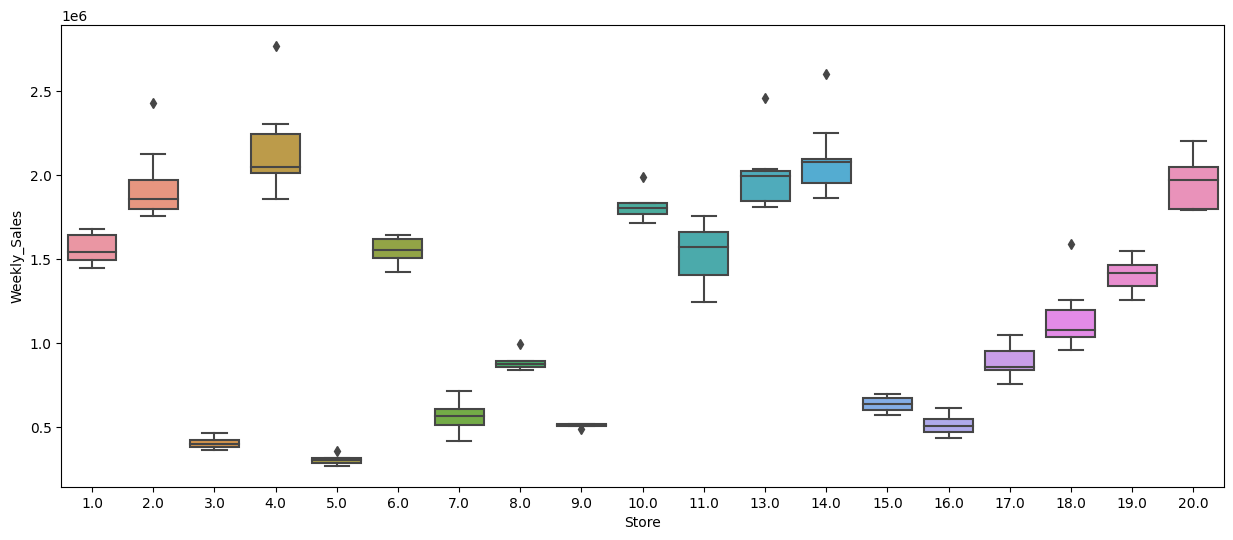

In [79]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='Store', y='Weekly_Sales')
plt.show()

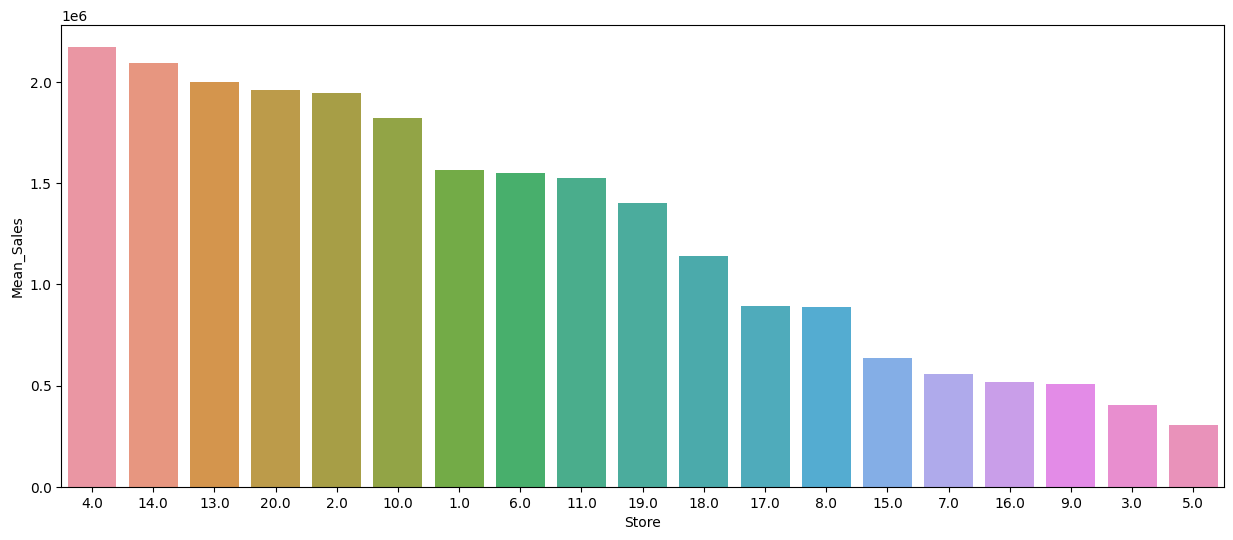

In [80]:
sales_by_store =data.groupby("Store")["Weekly_Sales"].mean().reset_index(name="Mean_Sales").sort_values(by="Mean_Sales",ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=sales_by_store['Store'],y=sales_by_store['Mean_Sales'],order=sales_by_store['Store'])
plt.show()

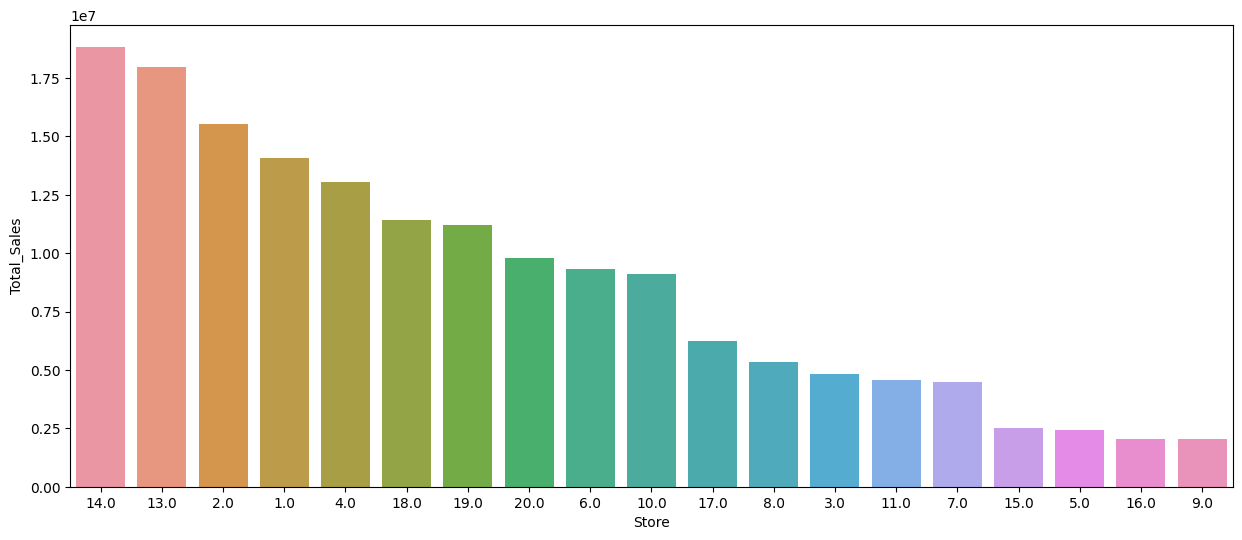

In [81]:
sales_by_store = data.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total_Sales").sort_values(by="Total_Sales",ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=sales_by_store['Store'],y=sales_by_store['Total_Sales'],order=sales_by_store['Store'])
plt.show()

### Weekly sales by Date 

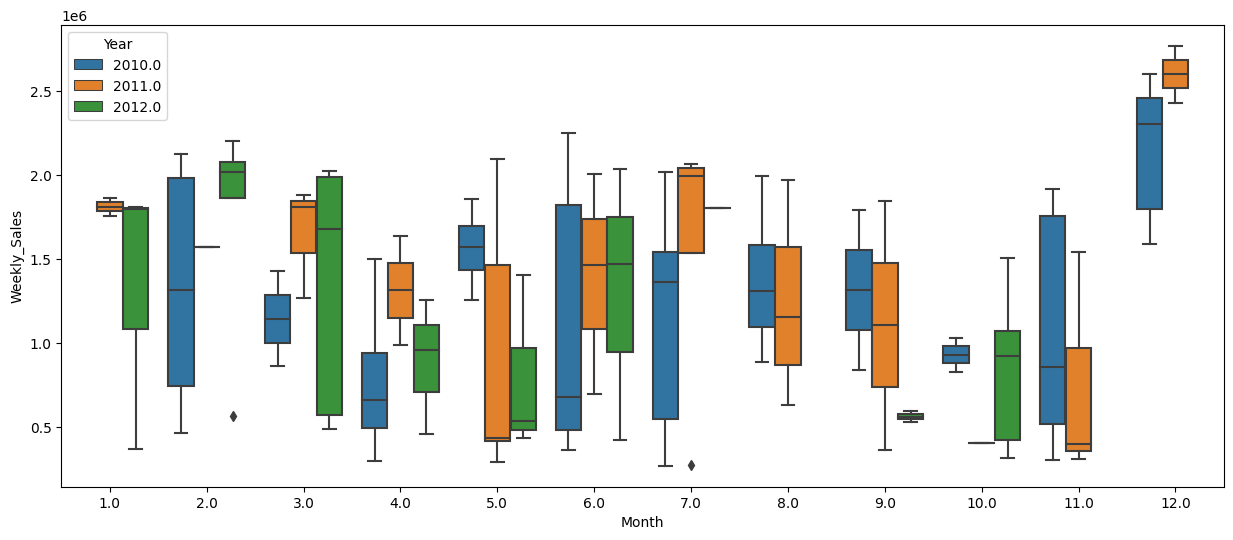

In [82]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='Month', y='Weekly_Sales', hue='Year')
plt.show()

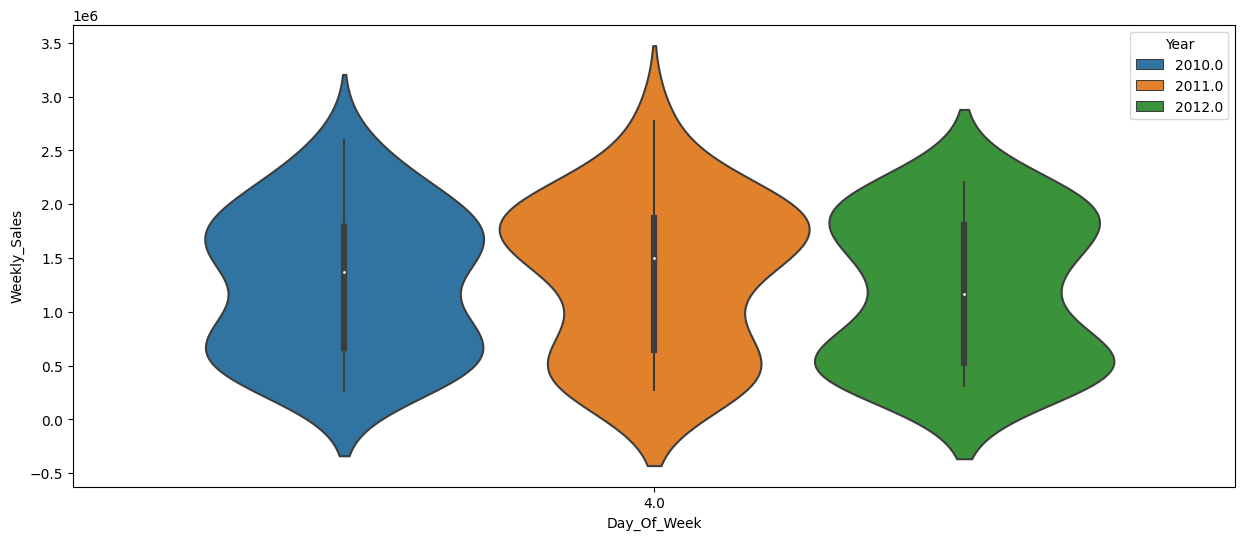

In [83]:
plt.figure(figsize=(15,6))
sns.violinplot(data=data, x='Day_Of_Week', y='Weekly_Sales', hue='Year')
plt.show()

### Weekly sales during Holidays

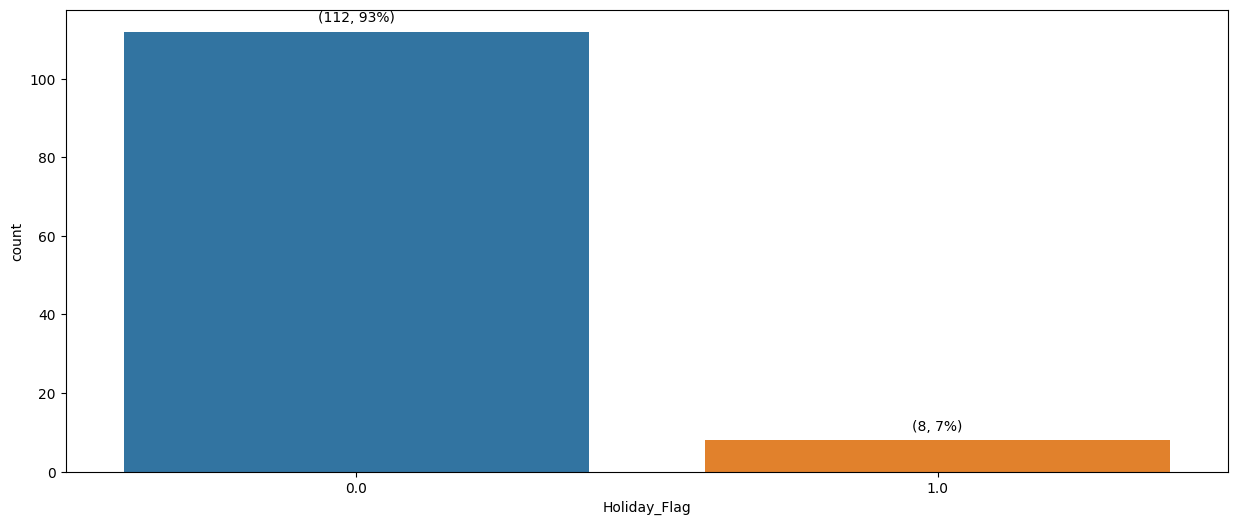

In [84]:
prop_HF = data["Holiday_Flag"].value_counts(normalize=True).reset_index()
prop_HF.columns = ["Holiday_Flag", "proportion"]


plt.figure(figsize=(15,6))
ax = sns.countplot(data=data, x='Holiday_Flag')

# Add number and proportion of each category
for p, prop, count in zip(ax.patches, prop_HF["proportion"], data["Holiday_Flag"].value_counts().sort_index()):
    ax.annotate(f'({count}, {prop:.0%})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

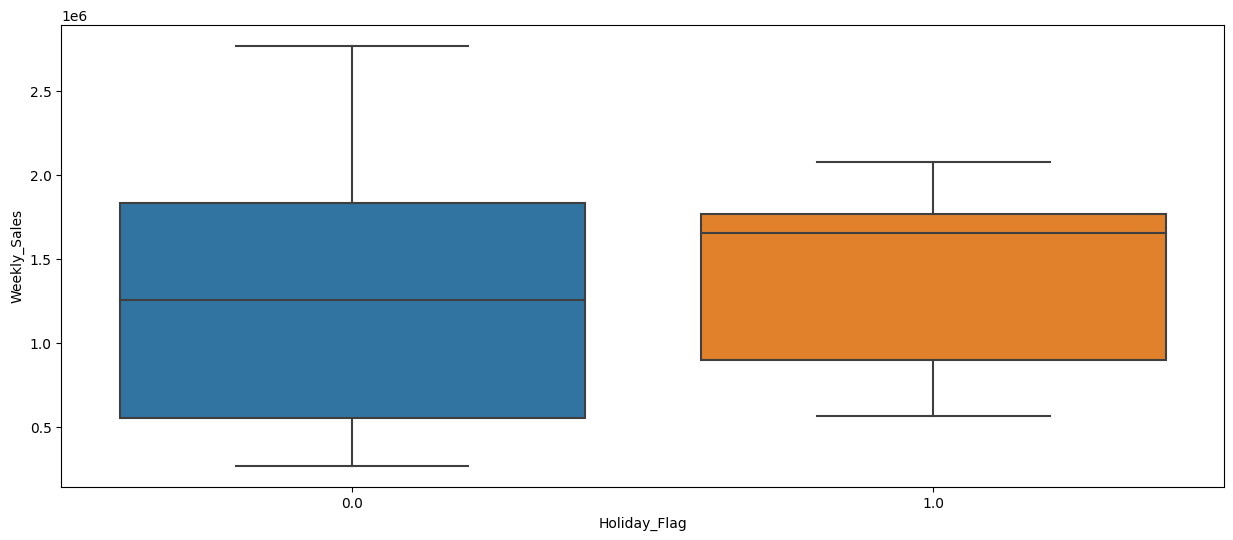

In [85]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='Holiday_Flag', y='Weekly_Sales')
plt.show()

### Weekly sales by respect of tempearture

In [92]:
print('Mean of Temperature :', round(data['Temperature'].mean(), 2))
print('\nMedian of Temperature :', round(data['Temperature'].median(),2))

# Create a figure with 2 subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Temperature Histogram', 'Temperature Box plot'))

# Add the histogram to the first subplot
fig.add_trace(px.histogram(data_frame=data, x='Temperature').data[0], row=1, col=1)

# Add the box plot to the second subplot
fig.add_trace(px.box(data_frame=data, x='Temperature').data[0], row=1, col=2)

# Update the layout of the figure
fig.update_layout(width=1000, height=500)

# Display the plot
fig.show()

Mean of Temperature : 60.85

Median of Temperature : 62.25


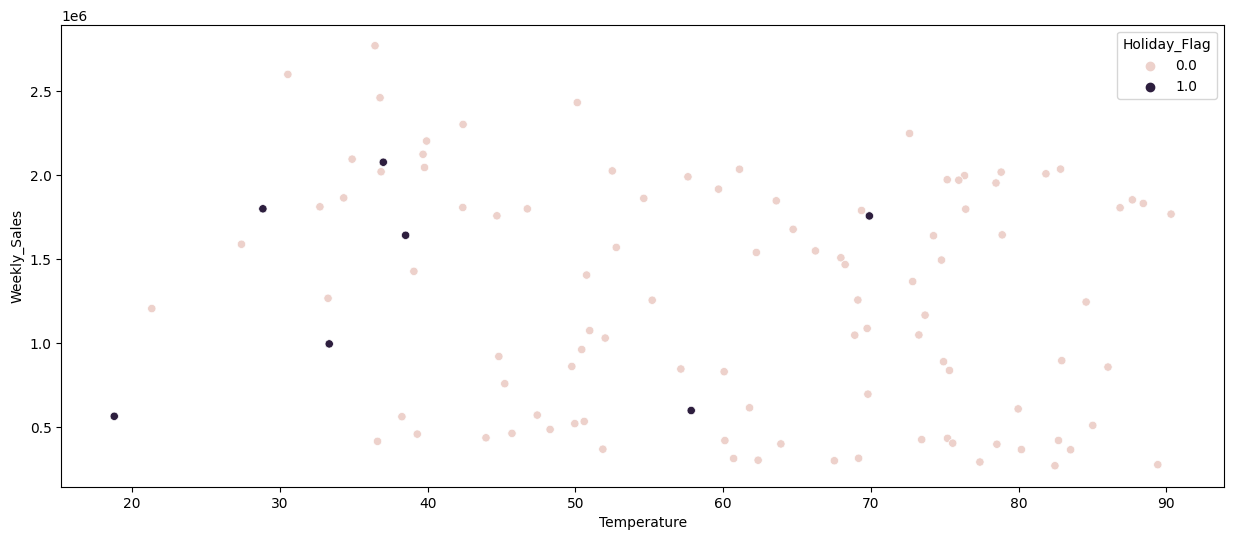

In [87]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='Temperature', y='Weekly_Sales', hue='Holiday_Flag')
plt.show()

### Weekly sales with respect of Fuel price

In [93]:
print('Mean of Fuel_Price :', round(data['Fuel_Price'].mean(), 2))
print('\nMedian of Fuel_Price :', round(data['Fuel_Price'].median(),2))

# Create a figure with 2 subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Fuel_Price Histogram', 'Fuel_Price Box plot'))

# Add the histogram to the first subplot
fig.add_trace(px.histogram(data_frame=data, x='Fuel_Price').data[0], row=1, col=1)

# Add the box plot to the second subplot
fig.add_trace(px.box(data_frame=data, x='Fuel_Price').data[0], row=1, col=2)

# Update the layout of the figure
fig.update_layout(width=1000, height=500)

# Display the plot
fig.show()

Mean of Fuel_Price : 3.32

Median of Fuel_Price : 3.45


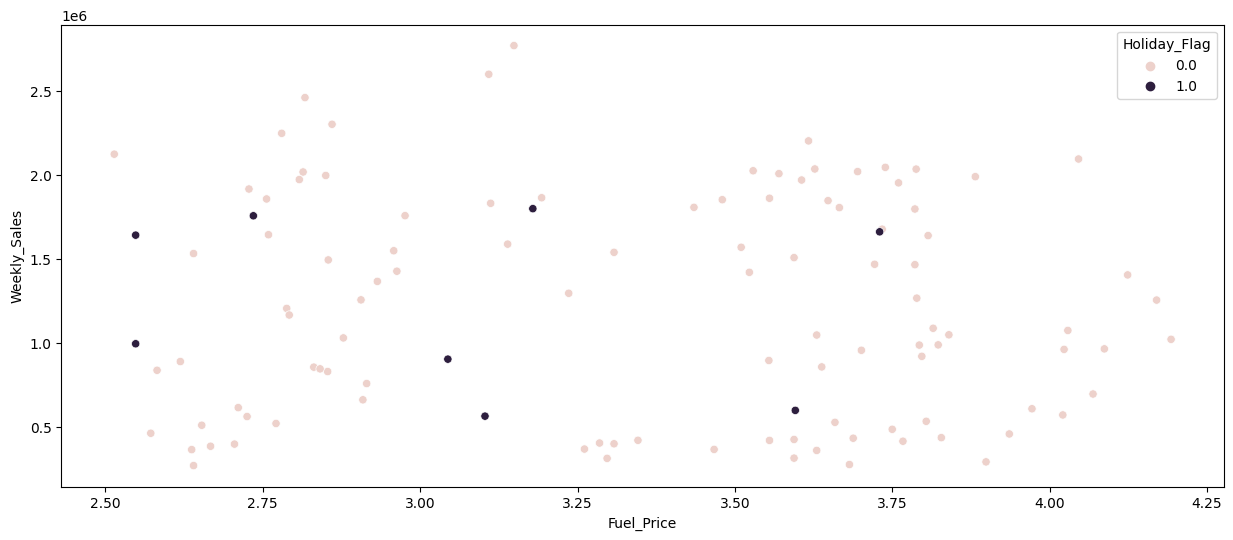

In [42]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='Fuel_Price', y='Weekly_Sales', hue='Holiday_Flag')
plt.show()

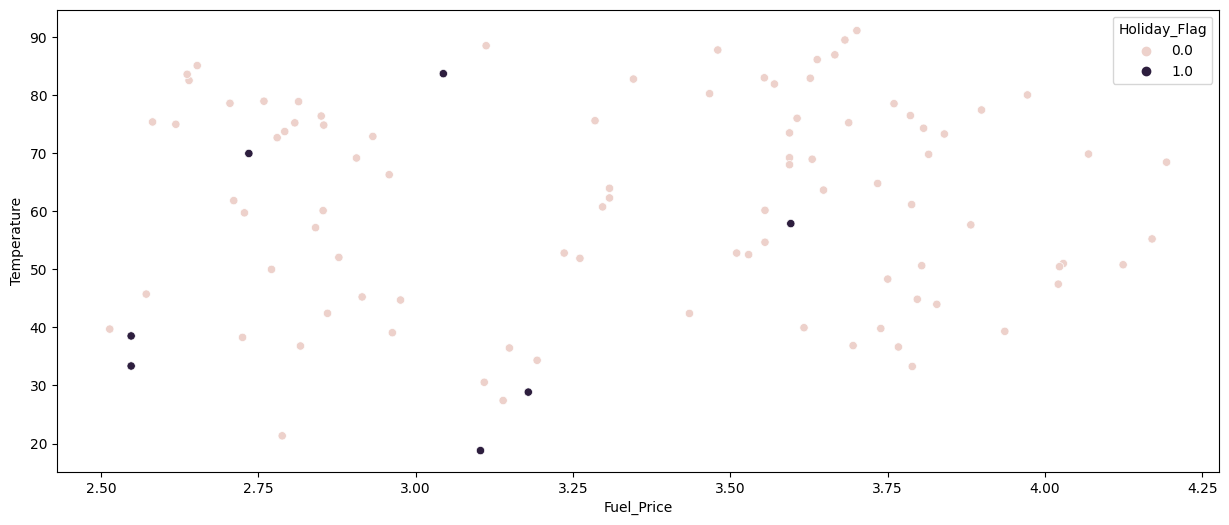

In [43]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='Fuel_Price', y='Temperature', hue='Holiday_Flag')
plt.show()

In [44]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_Of_Week
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


### Weekly sales with respect of CPI

In [94]:
print('Mean of CPI :', round(data['CPI'].mean(), 2))
print('\nMedian of CPI :', round(data['CPI'].median(),2))

# Create a figure with 2 subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('CPI Histogram', 'CPI Box plot'))

# Add the histogram to the first subplot
fig.add_trace(px.histogram(data_frame=data, x='CPI').data[0], row=1, col=1)

# Add the box plot to the second subplot
fig.add_trace(px.box(data_frame=data, x='CPI').data[0], row=1, col=2)

# Update the layout of the figure
fig.update_layout(width=1000, height=500)

# Display the plot
fig.show()

Mean of CPI : 178.09

Median of CPI : 196.92


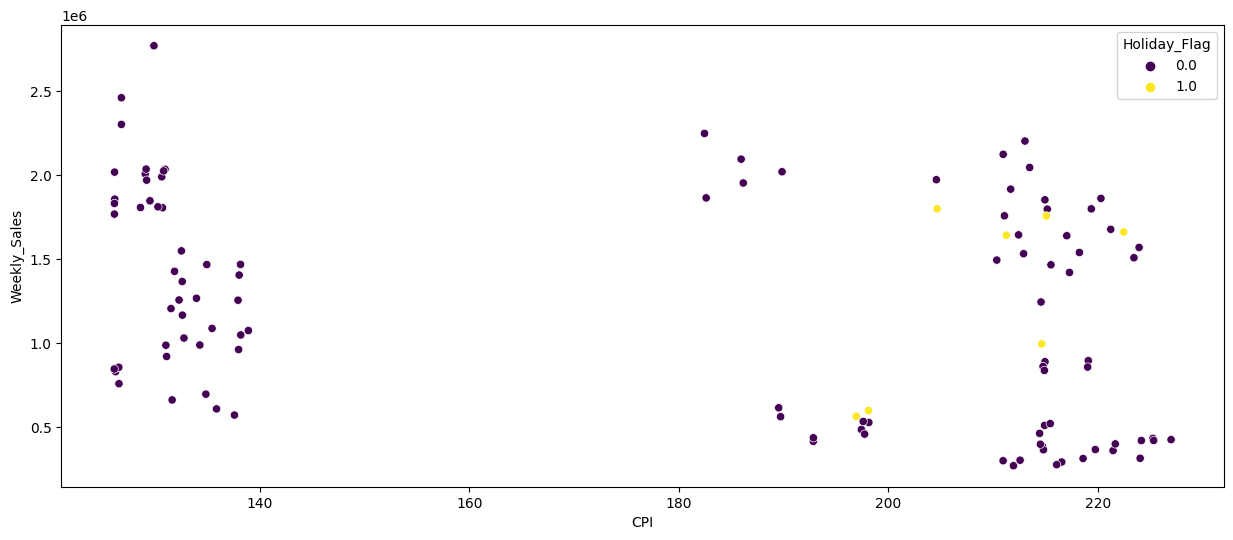

In [101]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='CPI', y='Weekly_Sales', hue='Holiday_Flag', palette="viridis")
plt.show()

### Weekly sales with respect of Unemployment

In [95]:
print('Mean of Unemployment :', round(data['Unemployment'].mean(), 2))
print('\nMedian of Unemployment :', round(data['Unemployment'].median(),2))

# Create a figure with 2 subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Unemployment Histogram', 'Unemployment Box plot'))

# Add the histogram to the first subplot
fig.add_trace(px.histogram(data_frame=data, x='Unemployment').data[0], row=1, col=1)

# Add the box plot to the second subplot
fig.add_trace(px.box(data_frame=data, x='Unemployment').data[0], row=1, col=2)

# Update the layout of the figure
fig.update_layout(width=1000, height=500)

# Display the plot
fig.show()

Mean of Unemployment : 7.67

Median of Unemployment : 7.48


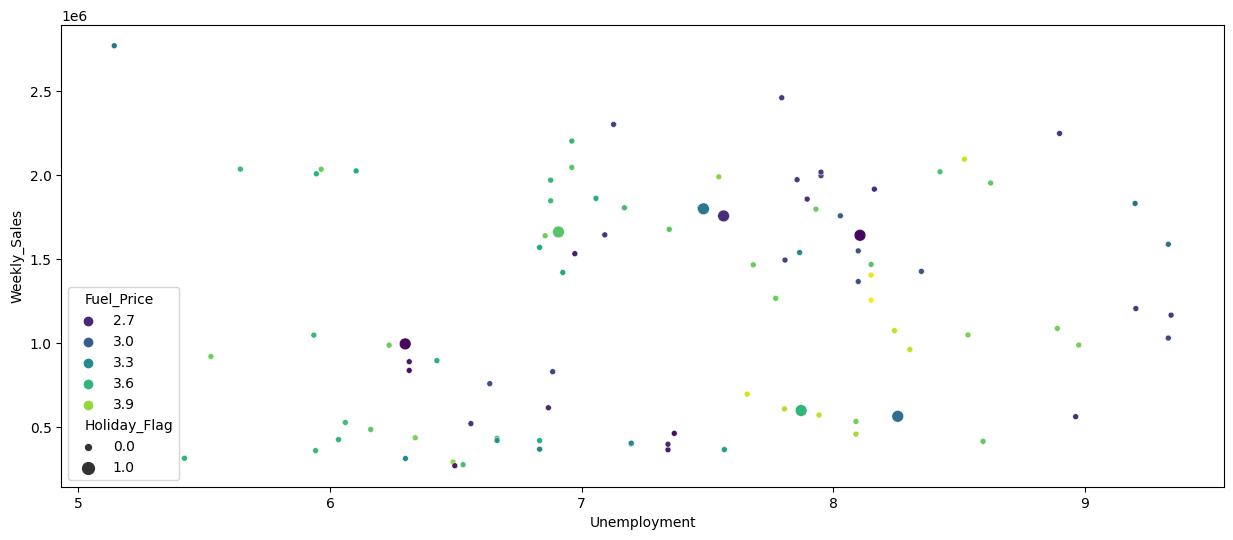

In [100]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='Unemployment', y='Weekly_Sales', hue='Fuel_Price', size='Holiday_Flag', palette="viridis")
plt.show()

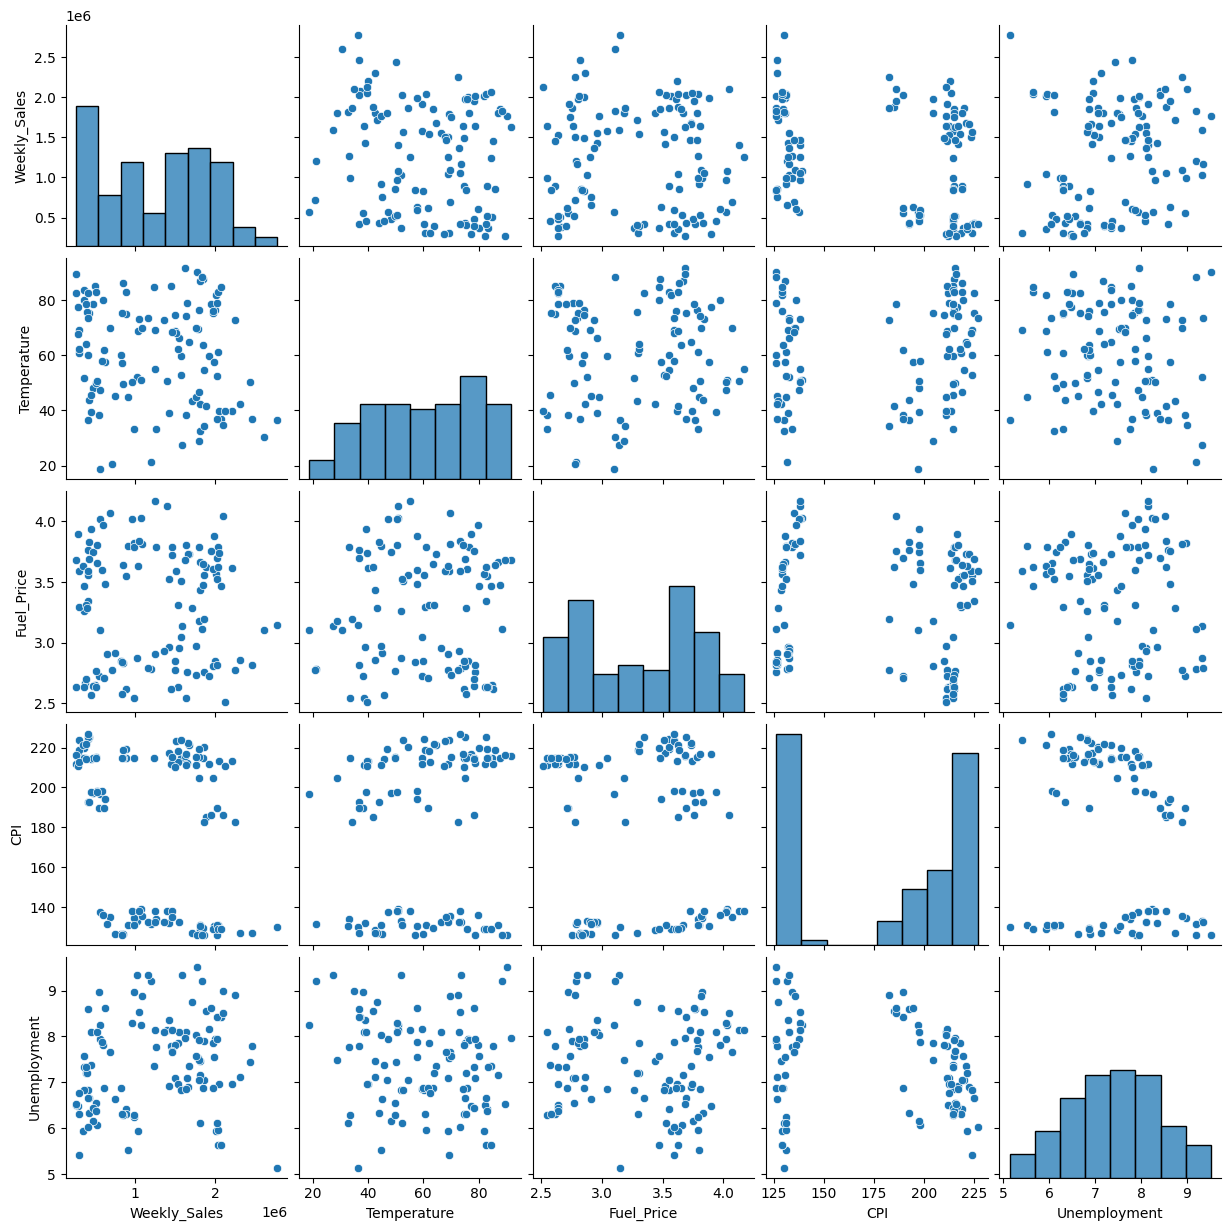

In [102]:
sns.pairplot(data[num_var], kind="scatter")

Text(0.5, 1.0, "Spearman's correlation between numeric attributes")

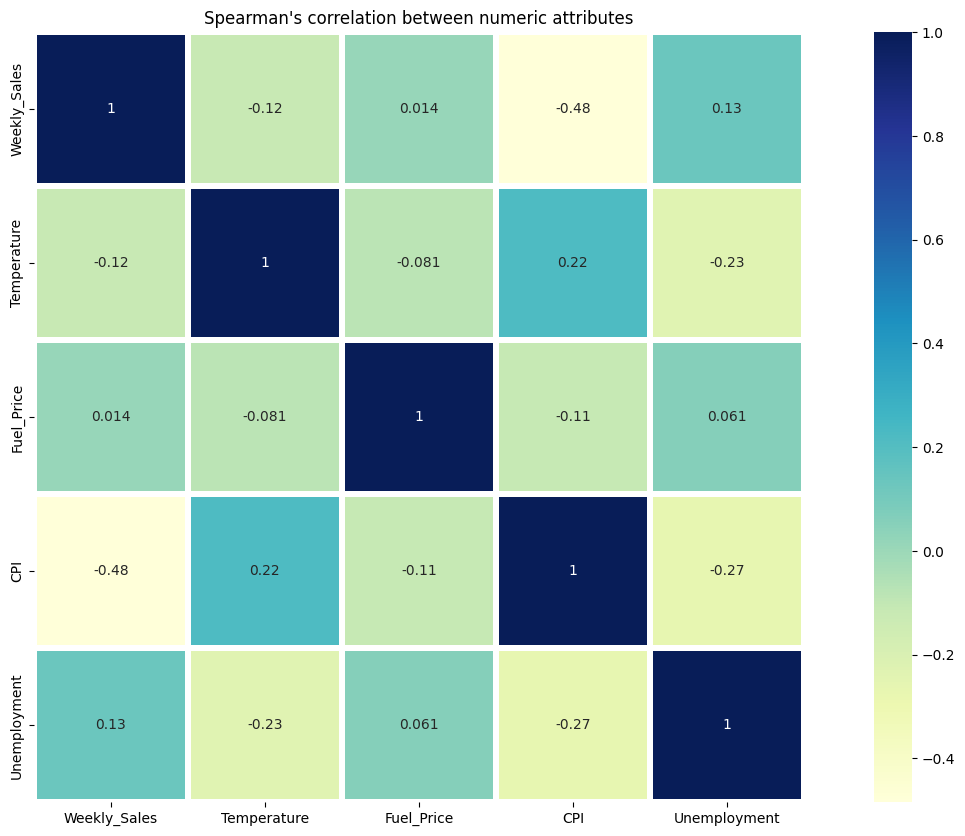

In [105]:
fig, ax = plt.subplots(figsize=(18,10)) 
sns.heatmap (data[num_var].dropna().corr(method='spearman'), annot=True, cmap = 'YlGnBu', linewidths=3, square=True, ax=ax)
ax.set_title('Spearman\'s correlation between numeric attributes')

In [106]:
def remove_outliers(df, col):

    mean_value = df[col].mean()
    std_value = df[col].std()

    mask = (df[col] < mean_value - 3*std_value) | (df[col] > mean_value + 3*std_value) 
    idx_line = df.loc[mask, col].index
    
    return df.drop(list(idx_line), axis=0, inplace=True)


print('Numbers of rows before dropping outliers:', data.shape[0], '\n')

cols = ['Temperature',	'Fuel_Price',	'CPI',	'Unemployment']


for c in cols:
    remove_outliers(data, c)
    print(f'Numbers of rows after dropped outliers in {c} column :', data.shape[0], '\n')


print('Numbers of rows after dropped all outliers in all columns :', data.shape[0], '\n')

Numbers of rows before dropping outliers: 131 

Numbers of rows after dropped outliers in Temperature column : 131 

Numbers of rows after dropped outliers in Fuel_Price column : 131 

Numbers of rows after dropped outliers in CPI column : 131 

Numbers of rows after dropped outliers in Unemployment column : 131 

Numbers of rows after dropped all outliers in all columns : 131 



### Baseline : Linear Regression 

In [122]:
# Separate target variable Y from features X
print("Separating labels from features...")

Y = data[['Weekly_Sales']]
X = data.drop('Weekly_Sales', axis=1)


print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
   Weekly_Sales
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
3   11.0           0.0        84.57         NaN  214.556497         7.346   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   

     Year  Month   Day  Day_Of_Week  
0  2011.0    2.0  18.0          4.0  
1  2011.0    3.0  25.0          4.0  
3     NaN    NaN   NaN          NaN  
4  2010.0    5.0  28.0          4.0  
5  2010.0    5.0  28.0          4.0  


In [123]:
X.dtypes

Store           float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year            float64
Month           float64
Day             float64
Day_Of_Week     float64
dtype: object

In [129]:
print('Dividing into train and test sets...')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print('... Done!')

Dividing into train and test sets...
... Done!


In [130]:
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_Of_Week']
categorical_features = ['Store', 'Holiday_Flag']

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()), 
    ('scaler', StandardScaler())
])

# Stores are numbers but nominal data, it is not a ranking
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore')) 
    ])

preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ])

In [131]:
print("Preprocessing X_train...")
print(X_train.head())
print()

X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print() 

Preprocessing X_train...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
89    2.0           0.0        76.42       3.786  215.154482         7.931   
51    2.0           0.0        59.69       2.728  211.660898         8.163   
0     6.0           NaN        59.61       3.045  214.777523         6.858   
13    1.0           0.0        64.74       3.734  221.211813         7.348   
46    5.0           0.0        82.46       2.640  211.927001         6.496   

      Year  Month   Day  Day_Of_Week  
89     NaN    NaN   NaN          NaN  
51  2010.0   11.0  12.0          4.0  
0   2011.0    2.0  18.0          4.0  
13  2012.0    3.0  16.0          4.0  
46  2010.0    7.0  30.0          4.0  

...Done!
[[ 0.78742795  1.02152732  0.8845015   0.56453816 -0.62491391  0.49778001
   0.44984265  0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.   

In [132]:
# Test pipeline
print("Preprocessing X_test...")
print(X_test.head())
print()
X_test = preprocessor.transform(X_test)
print("...Done!")
print(X_test[0:5,:]) # X_test is now a numpy array
print() 

Preprocessing X_test...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
60    14.0           0.0          NaN       4.046  185.937438         8.521   
44     1.0           1.0        38.51       2.548  211.242170         8.106   
21     5.0           0.0        77.38       3.899  216.534361         6.489   
35    19.0           0.0        33.26       3.789  133.958742         7.771   
130   13.0           0.0        52.50       3.529  130.826194         6.104   

       Year  Month   Day  Day_Of_Week  
60   2011.0    5.0   6.0          4.0  
44   2010.0    2.0  12.0          4.0  
21   2011.0    5.0  13.0          4.0  
35   2011.0    3.0  25.0          4.0  
130  2012.0    3.0  16.0          4.0  

...Done!
[[-0.10823574  1.59744604  0.1277461   1.18201686  0.15187151 -0.53347738
  -1.35258638  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.    

In [133]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [134]:
# Print scores
print("R2 score on training set : ", regressor.score(X_train, Y_train))
print("R2 score on test set : ", regressor.score(X_test, Y_test))

print("Deviation between R2 score on training set and test set : ", regressor.score(X_train, Y_train) - regressor.score(X_test, Y_test))

R2 score on training set :  0.9764382774979327
R2 score on test set :  0.9019349569794533
Deviation between R2 score on training set and test set :  0.07450332051847941


In [136]:
scores = cross_val_score(regressor, X_train, Y_train, cv=5)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.9439118840218127
The standard deviation is :  0.023700277902538047


,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_Of_Week,Store_2.0,Store_3.0,...,Store_11.0,Store_13.0,Store_14.0,Store_15.0,Store_16.0,Store_17.0,Store_18.0,Store_19.0,Store_20.0,Holiday_Flag_1.0
0,-60732.912492,-16767.978103,29504.931885,-59296.631982,-33039.345449,68196.420298,-17607.299795,9.313226e-10,368044.627955,-1.188324e+06,...,-98708.860993,436276.652616,605880.810128,-806451.87363,-1.159361e+06,-797869.16744,-325455.402437,-26806.366274,504480.272782,20914.522956


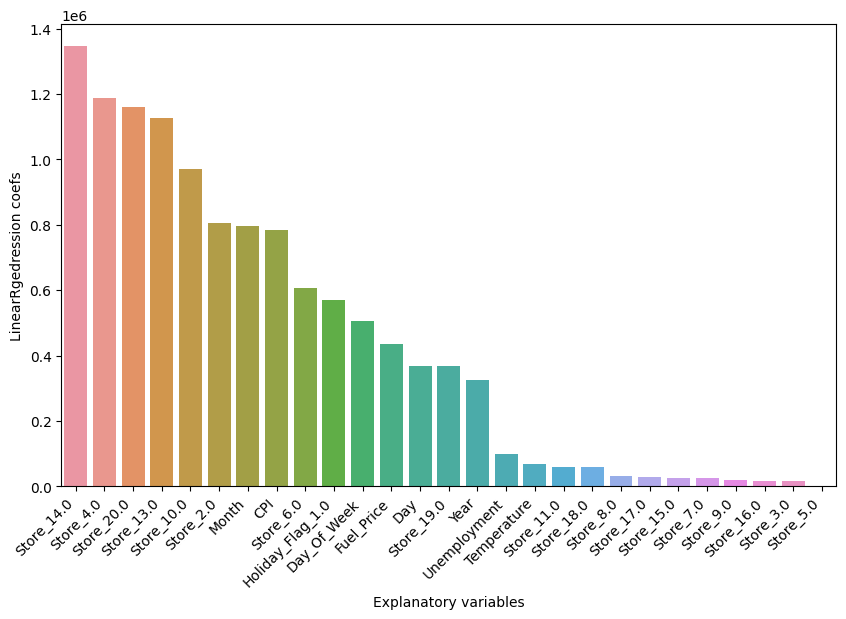

In [139]:
col_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())
coef = regressor.coef_
imp_feat = pd.DataFrame(columns=col_names, data=coef)
display(imp_feat)


idx = np.argsort(imp_feat.values)[0][::-1]
plt.figure(figsize=(10, 6))
chart = sns.barplot(x=list(imp_feat.columns[idx]), y=np.sort(abs(imp_feat.values[0]))[::-1], orient='v')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_xlabel('Explanatory variables')
chart.set_ylabel('LinearRgedression coefs')
plt.show()

In [231]:
# Create a Logistic Regression classifier object
model = Ridge()

# Define the parameter grid
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],

}

# Perform grid search using 5-fold cross-validation
Ridge_gridsearch = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=5)

# Fit the grid search to the data
Ridge_gridsearch.fit(X_train, Y_train)

# Print the best parameters and best score and std
print("Best mean test score: %f , and best std test score: %f best using %s" % (Ridge_gridsearch.best_score_, Ridge_gridsearch.cv_results_['std_test_score'][Ridge_gridsearch.best_index_], Ridge_gridsearch.best_params_))

Best mean test score: 0.943953 , and best std test score: 0.023694 best using {'alpha': 0.01}


In [232]:
# Train model
print("Train model...")
ridge = Ridge(alpha= 0.01, random_state=42)
ridge.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [234]:
# Print scores
print("R2 score on training set : ", ridge.score(X_train, Y_train))
print("R2 score on test set : ", ridge.score(X_test, Y_test))

print("Deviation between R2 score on training set and test set : ", ridge.score(X_train, Y_train) - ridge.score(X_test, Y_test))

R2 score on training set :  0.9764201595076347
R2 score on test set :  0.9026674564417466
Deviation between R2 score on training set and test set :  0.0737527030658881


In [235]:
scores = cross_val_score(ridge, X_train, Y_train, cv=5)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.943953108775769
The standard deviation is :  0.023694269030571955


,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_Of_Week,Store_2.0,Store_3.0,...,Store_11.0,Store_13.0,Store_14.0,Store_15.0,Store_16.0,Store_17.0,Store_18.0,Store_19.0,Store_20.0,Holiday_Flag_1.0
0,-60585.351341,-16102.68615,32573.923165,-56998.125474,-32696.07212,68253.336706,-17814.375572,0.0,376248.13655,-1.177461e+06,...,-89227.770182,451091.66709,613967.193432,-790783.055171,-1.142756e+06,-778845.34836,-313581.867678,-13803.799723,512316.226028,22201.268804


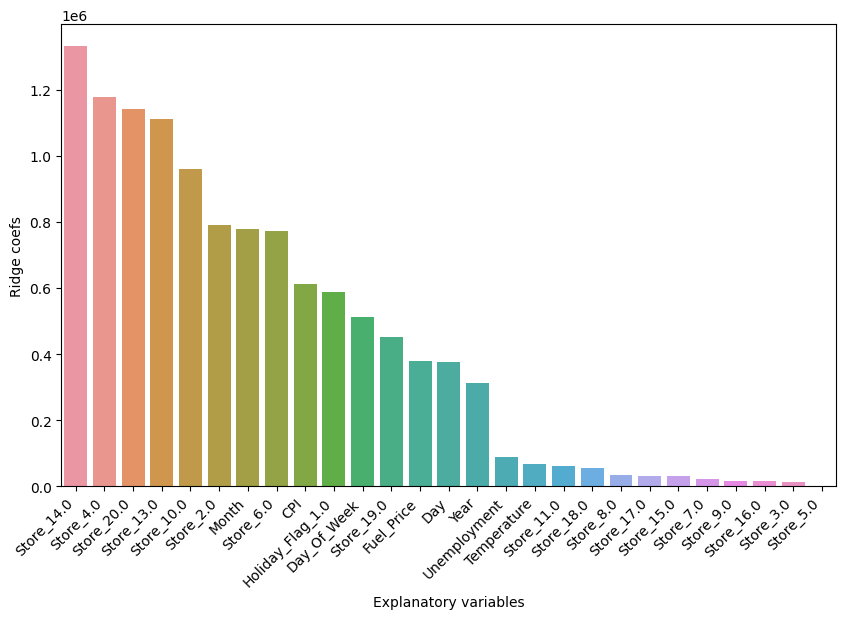

In [250]:
col_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())
coef = ridge.coef_
imp_feat = pd.DataFrame(columns=col_names, data=coef)
display(imp_feat)


idx = np.argsort(imp_feat.values)[0][::-1]
plt.figure(figsize=(10, 6))
chart = sns.barplot(x=list(imp_feat.columns[idx]), y=np.sort(abs(imp_feat.values[0]))[::-1], orient='v')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_xlabel('Explanatory variables')
chart.set_ylabel('Ridge coefs')
plt.show()

In [237]:
# Create a Logistic Regression classifier object
model = Lasso(tol=0.0025)

# Define the parameter grid
params = {
    'alpha': [0.1, 1, 10, 100, 500, 1000, 1500, 2000, 5000]
}

# Perform grid search using 5-fold cross-validation
Lasso_gridsearch = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=5)

# Fit the grid search to the data
Lasso_gridsearch.fit(X_train, Y_train)

# Print the best parameters and best score and std
print("Best mean test score: %f , and best std test score: %f best using %s" % (Lasso_gridsearch.best_score_, Lasso_gridsearch.cv_results_['std_test_score'][Lasso_gridsearch.best_index_], Lasso_gridsearch.best_params_))

Best mean test score: 0.946929 , and best std test score: 0.018406 best using {'alpha': 1000}


In [239]:
# Train model
print("Train model...")
lasso = Lasso(alpha= 1000, tol=0.0025, random_state=42)
lasso.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [240]:
# Print scores
print("R2 score on training set : ", lasso.score(X_train, Y_train))
print("R2 score on test set : ", lasso.score(X_test, Y_test))

print("Deviation between R2 score on training set and test set : ", lasso.score(X_train, Y_train) - lasso.score(X_test, Y_test))

R2 score on training set :  0.974939756258491
R2 score on test set :  0.9071425867534519
Deviation between R2 score on training set and test set :  0.06779716950503911


In [241]:
scores = cross_val_score(lasso, X_train, Y_train, cv=5)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.9469288826406048
The standard deviation is :  0.01840575101092753


,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_Of_Week,Store_2.0,Store_3.0,...,Store_11.0,Store_13.0,Store_14.0,Store_15.0,Store_16.0,Store_17.0,Store_18.0,Store_19.0,Store_20.0,Holiday_Flag_1.0
0,-59098.596296,-13714.996959,22270.679016,-38974.738919,-25682.270415,67620.447588,-17153.126481,0.0,402307.40756,-1.121225e+06,...,-0.0,463427.074844,619394.176855,-755210.10093,-1.056676e+06,-723085.746826,-301973.635071,-0.0,522605.834779,0.0


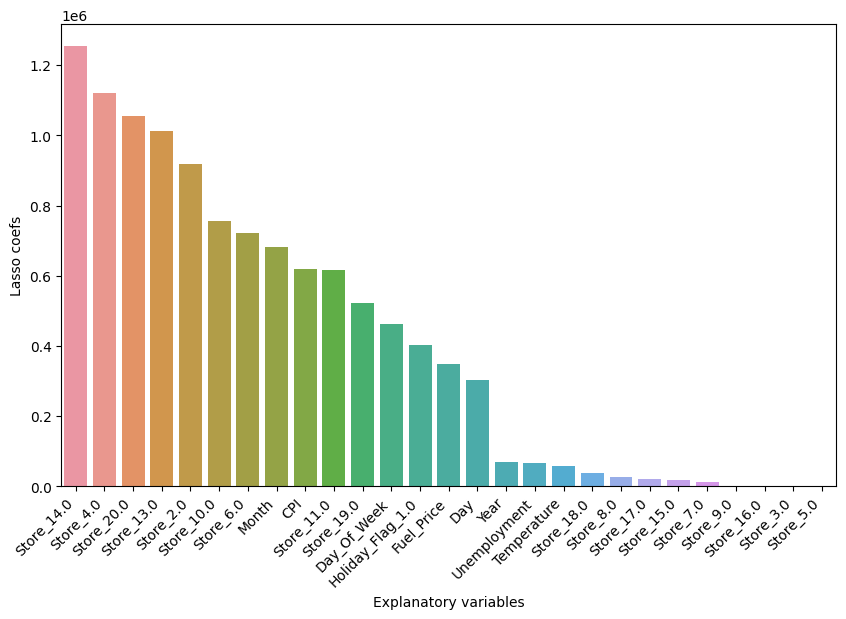

In [255]:
col_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())
coef = lasso.coef_
coef = coef.reshape((1,27))
imp_feat = pd.DataFrame(columns=col_names, data=coef)
display(imp_feat)


idx = np.argsort(imp_feat.values)[0][::-1]
plt.figure(figsize=(10, 6))
chart = sns.barplot(x=list(imp_feat.columns[idx]), y=np.sort(abs(imp_feat.values[0]))[::-1], orient='v')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_xlabel('Explanatory variables')
chart.set_ylabel('Lasso coefs')
plt.show()

In [254]:
coef = coef.reshape((1,27))
coef.shape

(1, 27)